In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
from IPython import display
from matplotlib import cm

In [2]:
Nagents = 50
Nsteps = 500

In [3]:
class Agent:
    
    def __init__(self,kp=0.5, ki=0.01):
        
        self.position = 5*np.random.rand(2,)-2.5
        self.reset()
        self.kp = kp
        self.ki = ki
        
    def set_goal(self,goal):
        
        self.goal = goal
        
    def reset(self):
        
        self.velocity = np.zeros(2,)
        self.goal = 5*np.random.rand(2,)-2.5
        
        self.history = [self.position.copy()]
    
    def step(self,usf,dt=0.1):
        
        self.history.append(self.position.copy())
        
        u = self.kp*(self.goal-self.position) + usf + self.ki*np.sum(self.goal - np.stack(self.history),axis=0)
        self.position = self.position + dt*self.velocity
        self.velocity = u
        
        return self.position,self.velocity
    
    def plot(self,ax,colour):
        
        ax.plot(np.array(self.history)[:,0],np.array(self.history)[:,1],'-',markersize=5,color=colour)
        ax.plot(self.position[0],self.position[1],'o',markersize=5,label='position',color=colour)
        ax.plot(self.goal[0],self.goal[1],'x',markersize=5,label='goal',color=colour)
        

In [4]:
def compute_social_forces(list_of_agents,sigma_repulsion=10,sigma_attraction=1,ksf_repulsion=1,ksf_attraction=0.1,attraction_offset = 0.5):
    
    # Get all agent positions
    pos = np.stack([agent.position for agent in list_of_agents])
    
    # compute pairwise distance between agents and turn into distance based weighting
    dist = squareform(pdist(pos))
    weight = np.exp(-sigma_repulsion*dist)
    np.fill_diagonal(weight,0) # cancel out effect of self
    
    # compute social force (repulsion)
    u = -ksf_repulsion*np.sum(weight[:,:,np.newaxis]*(pos[:,np.newaxis,:]-pos),axis=0)
    
    # compute social force (attraction)
    weight = np.exp(-sigma_attraction*dist-attraction_offset)
    np.fill_diagonal(weight,0) # cancel out effect of self
    u = u + ksf_attraction*np.sum(weight[:,:,np.newaxis]*(pos[:,np.newaxis,:]-pos),axis=0)
    
    return u

In [5]:
list_of_agents = [Agent(kp=2) for i in range(Nagents)]
colours = cm.get_cmap('tab20',Nagents)(np.linspace(0,1,Nagents))

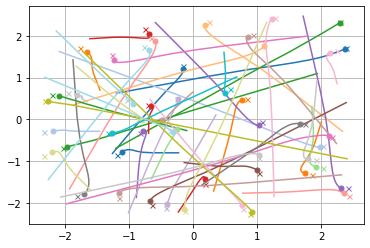

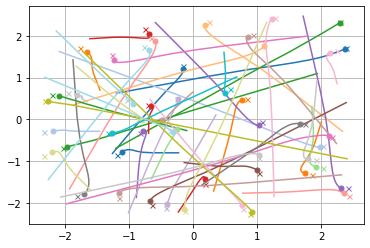

In [6]:
fig, ax = plt.subplots()
[agent.reset() for agent in list_of_agents]
for j in range(Nsteps):
    plt.cla()
    [agent.plot(ax,colours[i]) for i,agent in enumerate(list_of_agents)]
    
    usf = compute_social_forces(list_of_agents)
    [agent.step(usf[i,:]) for i,agent in enumerate(list_of_agents)]

    plt.grid('on')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    if (j %50==0):
        [agent.reset() for agent in list_of_agents]

plt.show()

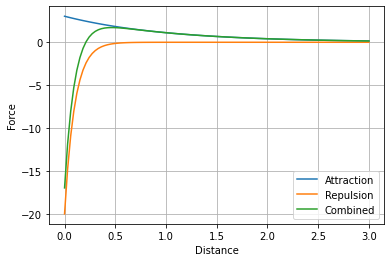

In [7]:
x = np.linspace(0,3,100)

sigma_repulsion=10
sigma_attraction=1
ksf_repulsion=20
ksf_attraction=5
attraction_offset = 0.5

Fa = ksf_attraction*np.exp(-sigma_attraction*x-attraction_offset)
Fr = -ksf_repulsion*np.exp(-sigma_repulsion*x)

plt.plot(x,Fa,label='Attraction')
plt.plot(x,Fr,label='Repulsion')
plt.plot(x,Fa+Fr,label='Combined')
plt.grid('on')
plt.ylabel('Force')
plt.xlabel('Distance')
plt.legend()
plt.show()